pip install --upgrade opencv-contrib-python


pip install --upgrade --force-reinstall opencv-contrib-python --user


## The two cells below use a pre-trained OpenCV model that performs 2x upscaling. There's also a version of the same model that performs 4x upscaling, and I tried that as well.

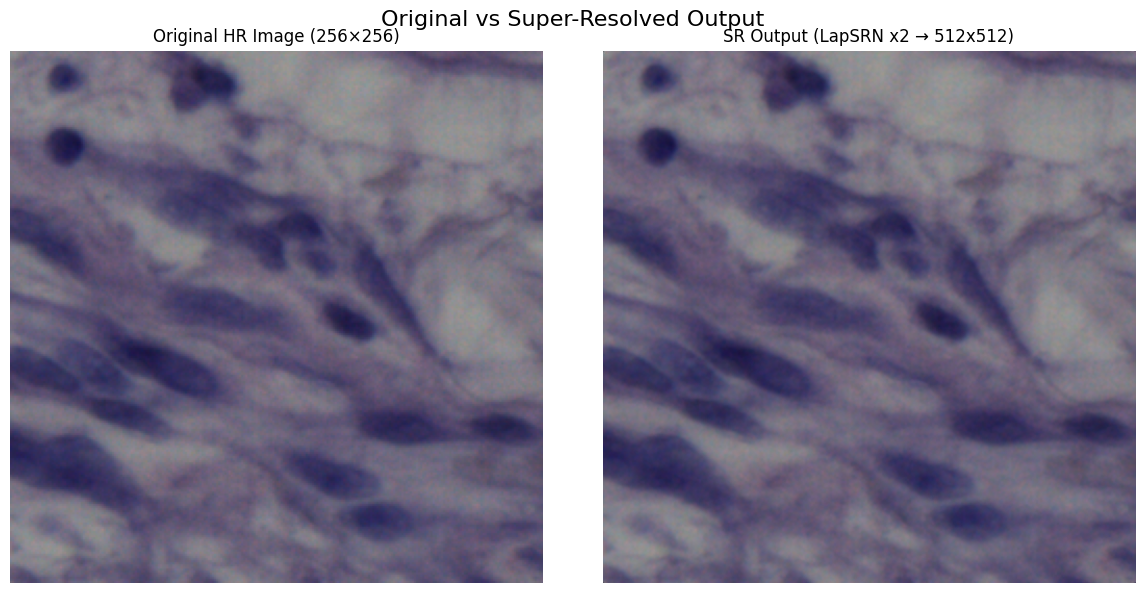

In [3]:
import cv2
import matplotlib.pyplot as plt

# 1. LapSRN modelini y√ºkle
sr = cv2.dnn_superres.DnnSuperResImpl_create()
sr.readModel("models/LapSRN_x2.pb")
sr.setModel("lapsrn", 2)

# 2. G√∂rseli oku
image = cv2.imread("downsampled_images/human_bladder_01.png")

# 3. Super-Resolution uygula
result = sr.upsample(image)

# 4. BGR'den RGB'ye √ßevir (cv2 ‚Üí plt i√ßin)
result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
hr = cv2.imread("downsampled_images/human_bladder_01.png")
hr_rgb = cv2.cvtColor(hr, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(hr_rgb)
plt.title("Original HR Image (256√ó256)")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(result_rgb)
plt.title("SR Output (LapSRN x2 ‚Üí 512x512)")
plt.axis("off")

plt.suptitle("Original vs Super-Resolved Output", fontsize=16)
plt.tight_layout()
plt.show()

In [4]:
from skimage.metrics import peak_signal_noise_ratio, structural_similarity
import numpy as np
import cv2

# 1. SR ve HR g√∂rselleri RGB ve float32 [0,1] formatƒ±na √ßevir
sr_norm = result_rgb.astype(np.float32) / 255.0

hr = cv2.imread("downsampled_images/human_bladder_01.png")
hr_rgb = cv2.cvtColor(hr, cv2.COLOR_BGR2RGB)

# 2. HR g√∂r√ºnt√ºy√º SR boyutuna resize et
h, w, _ = result_rgb.shape  # SR boyutlarƒ±
hr_resized = cv2.resize(hr_rgb, (w, h), interpolation=cv2.INTER_CUBIC)

hr_norm = hr_resized.astype(np.float32) / 255.0

# 3. PSNR & SSIM hesapla
psnr = peak_signal_noise_ratio(hr_norm, sr_norm, data_range=1.0)
ssim = structural_similarity(hr_norm, sr_norm, channel_axis=2, data_range=1.0)

print(f"üîç PSNR: {psnr:.2f} dB")
print(f"üîç SSIM: {ssim:.4f}")


üîç PSNR: 46.74 dB
üîç SSIM: 0.9868


### This is where the 4x model is applied, and the output here is 1024x1024.

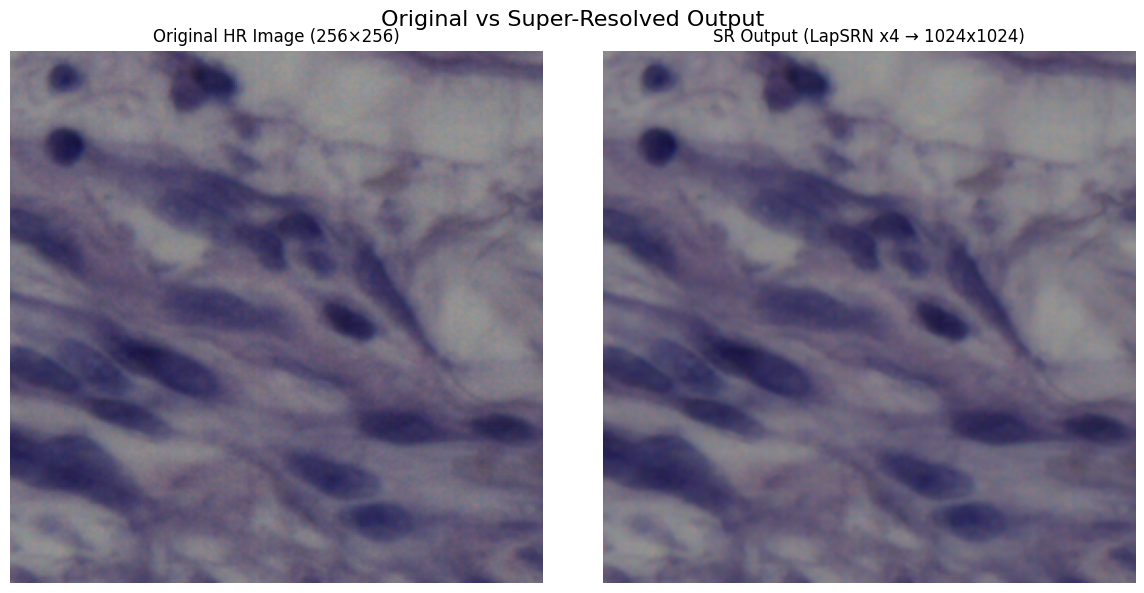

In [9]:
import cv2
import matplotlib.pyplot as plt

# 1. LapSRN modelini y√ºkle
sr_2 = cv2.dnn_superres.DnnSuperResImpl_create()
sr_2.readModel("models/LapSRN_x4.pb")
sr_2.setModel("lapsrn", 4)

# 2. G√∂rseli oku
image_2 = cv2.imread("downsampled_images/human_bladder_01.png")

# 3. Super-Resolution uygula
result_2 = sr_2.upsample(image_2)

# 4. BGR'den RGB'ye √ßevir (cv2 ‚Üí plt i√ßin)
result_rgb_2 = cv2.cvtColor(result_2, cv2.COLOR_BGR2RGB)
hr_2 = cv2.imread("downsampled_images/human_bladder_01.png")
hr_rgb_2 = cv2.cvtColor(hr_2, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(hr_rgb_2)
plt.title("Original HR Image (256√ó256)")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(result_rgb_2)
plt.title("SR Output (LapSRN x4 ‚Üí 1024x1024)")
plt.axis("off")

plt.suptitle("Original vs Super-Resolved Output", fontsize=16)
plt.tight_layout()
plt.show()

In [10]:


# 1. SR ve HR g√∂rselleri RGB ve float32 [0,1] formatƒ±na √ßevir
sr_norm_2 = result_rgb_2.astype(np.float32) / 255.0

hr_2 = cv2.imread("downsampled_images/human_bladder_01.png")
hr_rgb_2 = cv2.cvtColor(hr, cv2.COLOR_BGR2RGB)

# 2. HR g√∂r√ºnt√ºy√º SR boyutuna resize et
h_2, w_2, __2 = result_rgb_2.shape  # SR boyutlarƒ±
hr_resized_2 = cv2.resize(hr_rgb_2, (w_2, h_2), interpolation=cv2.INTER_CUBIC)

hr_norm_2 = hr_resized_2.astype(np.float32) / 255.0

# 3. PSNR & SSIM hesapla
psnr_2 = peak_signal_noise_ratio(hr_norm_2, sr_norm_2, data_range=1.0)
ssim_2= structural_similarity(hr_norm_2, sr_norm_2, channel_axis=2, data_range=1.0)

print(f"üîç PSNR: {psnr_2:.2f} dB")
print(f"üîç SSIM: {ssim_2:.4f}")


üîç PSNR: 45.94 dB
üîç SSIM: 0.9843
